In [1]:
decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

decode (generic function with 3 methods)

In [2]:
[decode(Float16(1//3)), decode(Float32(1//3)), decode(Float64(1//3)), decode(Float64(Float16(1//3)))]

4-element Vector{Tuple{Char, String, String}}:
 ('0', "01101", "0101010101")
 ('0', "01111101", "01010101010101010101011")
 ('0', "01111111101", "0101010101010101010101010101010101010101010101010101")
 ('0', "01111111101", "0101010101000000000000000000000000000000000000000000")

In [33]:
c = Float16[]
diffs = Float64[]
n = Float16(1)
while n < 1000000
    next_n = nextfloat(n)
    push!(diffs, Float64(next_n) - Float64(n))
    push!(c, n)
    n = next_n
end

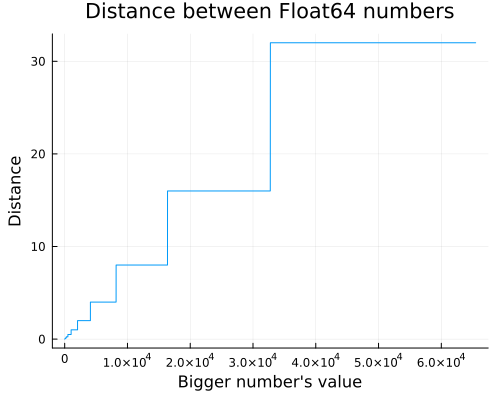

In [53]:
using Plots

plot(c, diffs, title="Distance between Float16 numbers", xlabel="Bigger number's value", ylabel="Distance", legend=false, size=(500, 400))

```c
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main() {
  float n = 0.001;
  while (n > 0.0) {
    n /= 2;
    gsl_ieee_printf_float(&n);
    printf("\n");
  }
  return 0;
}
```

``` 
 1.00000110001001001101111*2^-11
 1.00000110001001001101111*2^-12
 1.00000110001001001101111*2^-13
 1.00000110001001001101111*2^-14
...
 1.00000110001001001101111*2^-125
 1.00000110001001001101111*2^-126
 0.10000011000100100111000*2^-126
 0.01000001100010010011100*2^-126
 0.00100000110001001001110*2^-126
 0.00010000011000100100111*2^-126
 0.00001000001100010010100*2^-126
 0.00000100000110001001010*2^-126
 0.00000010000011000100101*2^-126
 0.00000001000001100010010*2^-126
 0.00000000100000110001001*2^-126
 0.00000000010000011000100*2^-126
 0.00000000001000001100010*2^-126
 0.00000000000100000110001*2^-126
 0.00000000000010000011000*2^-126
 0.00000000000001000001100*2^-126
 0.00000000000000100000110*2^-126
 0.00000000000000010000011*2^-126
 0.00000000000000001000010*2^-126
 0.00000000000000000100001*2^-126
 0.00000000000000000010000*2^-126
 0.00000000000000000001000*2^-126
 0.00000000000000000000100*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
 0
```